In [1]:
import pandas as pd 
import  numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df=pd.read_csv("C:/Users/tyuiop/Desktop/Perron//Banque.csv", decimal=',',sep=";", encoding="latin1") 
df.head()

,ID,Age,Experience,Revenu Millier,Famille,Dépense mensuellesmoyenne,Education,Compte Epargne Logement,Prêt Personnel
0,1,25,1,49,4,1600,1,Non,Non
1,2,45,19,34,3,1500,1,Non,Non
2,3,39,15,11,1,1000,1,Non,Non
3,4,35,9,100,1,2700,2,Non,Non
4,5,35,8,45,4,1000,2,Non,Non


**Description statistique pour chaque variable**


***I) Variables Quantitatives***

In [3]:
df['Age'].describe()


count    4894.000000
mean       45.333265
std        11.474275
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

In [4]:
df['Experience'].describe()


count    4894.000000
mean       20.088680
std        11.475238
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [5]:
# Renommer la colonne en supprimant l'espace à la fin
df.rename(columns={'Revenu Millier ': 'Revenu Millier'}, inplace=True)

# Maintenant, tu peux utiliser la commande sans l'espace
df['Revenu Millier'].describe()


count    4894.000000
mean       73.684716
std        46.045208
min         8.000000
25%        39.000000
50%        63.000000
75%        98.000000
max       224.000000
Name: Revenu Millier, dtype: float64

In [6]:
df['Famille'].describe()


count    4894.000000
mean        2.405394
std         1.149174
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Famille, dtype: float64

In [7]:


# Renommer la colonne en supprimant l'espace à la fin
df.rename(columns={'Dépense mensuellesmoyenne  ': 'DepensesMensuelles'}, inplace=True)

# Maintenant, tu peux utiliser la commande avec le nouveau nom
df['DepensesMensuelles'].describe()


count     4894.000000
mean      1979.912137
std       1742.801543
min        100.000000
25%        700.000000
50%       1600.000000
75%       2600.000000
max      10000.000000
Name: DepensesMensuelles, dtype: float64

In [8]:
# Vérifier que la colonne a été renommée
print(df.columns)

Index(['ID', 'Age', 'Experience', 'Revenu Millier', 'Famille',
       'DepensesMensuelles', 'Education', 'Compte Epargne Logement',
       'Prêt Personnel'],
      dtype='object')


***II) Variables Qualitatives***

In [9]:
# Calculer les fréquences et les effectifs pour la variable qualitative "Education"
frequence_education = df['Education'].value_counts(normalize=True)  # Fréquences
effectif_education = df['Education'].value_counts()               # Effectifs

# Afficher les résultats
print("Fréquences pour la variable 'Education':\n", frequence_education)
print("\nEffectifs pour la variable 'Education':\n", effectif_education)





Fréquences pour la variable 'Education':
 Education
1    0.415815
3    0.301389
2    0.282795
Name: proportion, dtype: float64

Effectifs pour la variable 'Education':
 Education
1    2035
3    1475
2    1384
Name: count, dtype: int64


In [10]:
# Renommer la colonne
df.rename(columns={'Compte Epargne Logement': 'EpargneLogement'}, inplace=True)

# Calculer les fréquences et les effectifs pour la variable qualitative "EpargneLogement"
frequence_epargne_logement = df['EpargneLogement'].value_counts(normalize=True)  # Fréquences
effectif_epargne_logement = df['EpargneLogement'].value_counts()               # Effectifs

# Afficher les résultats
print("Fréquences pour la variable 'EpargneLogement':\n", frequence_epargne_logement)
print("\nEffectifs pour la variable 'EpargneLogement':\n", effectif_epargne_logement)


Fréquences pour la variable 'EpargneLogement':
 EpargneLogement
Non    0.9387
Oui    0.0613
Name: proportion, dtype: float64

Effectifs pour la variable 'EpargneLogement':
 EpargneLogement
Non    4594
Oui     300
Name: count, dtype: int64


In [11]:
# Calculer les fréquences et les effectifs pour la variable qualitative "Prêt Personnel"
frequence_pret_personnel = df['Prêt Personnel'].value_counts(normalize=True)  # Fréquences
effectif_pret_personnel = df['Prêt Personnel'].value_counts()               # Effectifs

# Afficher les résultats
print("Fréquences pour la variable 'Prêt Personnel':\n", frequence_pret_personnel)
print("\nEffectifs pour la variable 'Prêt Personnel':\n", effectif_pret_personnel)


Fréquences pour la variable 'Prêt Personnel':
 Prêt Personnel
Non    0.902125
Oui    0.097875
Name: proportion, dtype: float64

Effectifs pour la variable 'Prêt Personnel':
 Prêt Personnel
Non    4415
Oui     479
Name: count, dtype: int64


# Partie 2 : Relation entre variables et visualisation des données
<div style="background-color: #ADD8E6; padding: 10px; border-radius: 5px; margin: 10px 0;">
    <p style="color: #000080; font-weight: bold;">Note sur la démarche :</p>
    <p>Nous adoptons une approche méthodique pour explorer les relations entre les variables. Chaque analyse est suivie de représentations graphiques conformément aux instructions, et nous concluons chaque section en appliquant les tests statistiques appropriés pour étayer nos observations.</p>
</div>


Prêt Personnel selon l'âge


In [12]:
# Statistiques descriptives pour 'Prêt Personnel' selon l'âge
stats_age_pret_personnel = df.groupby('Prêt Personnel')['Age'].describe()

# Afficher les résultats
print("Statistiques descriptives pour 'Prêt Personnel' selon l'âge:\n", stats_age_pret_personnel)


Statistiques descriptives pour 'Prêt Personnel' selon l'âge:
                  count       mean        std   min   25%   50%   75%   max
Prêt Personnel                                                            
Non             4415.0  45.359003  11.463205  23.0  35.0  45.0  55.0  67.0
Oui              479.0  45.096033  11.585193  26.0  35.0  45.0  55.0  65.0


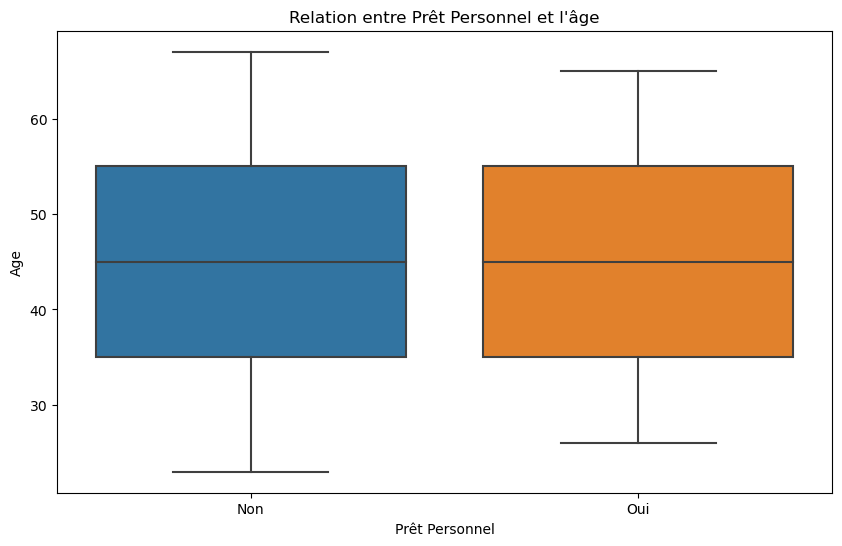

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot pour 'Prêt Personnel' et 'Age'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Prêt Personnel', y='Age', data=df)
plt.title('Relation entre Prêt Personnel et l\'âge')
plt.show()


In [14]:
from scipy.stats import f_oneway

# Diviser le DataFrame en groupes selon 'Prêt Personnel'
groupes = [df['Age'][df['Prêt Personnel'] == cat] for cat in df['Prêt Personnel'].unique()]

# Effectuer le test ANOVA
statistique, p_value = f_oneway(*groupes)
print(f"Test ANOVA : statistique = {statistique}, p-value = {p_value}")


Test ANOVA : statistique = 0.22693187741696996, p-value = 0.6338294614977877


Prêt Personnel selon l'Experience

In [15]:
# Statistiques descriptives pour 'Prêt Personnel' selon l'expérience
stats_experience_pret_personnel = df.groupby('Prêt Personnel')['Experience'].describe()

# Afficher les résultats
print("Statistiques descriptives pour 'Prêt Personnel' selon l'expérience:\n", stats_experience_pret_personnel)


Statistiques descriptives pour 'Prêt Personnel' selon l'expérience:
                  count       mean        std  min   25%   50%   75%   max
Prêt Personnel                                                           
Non             4415.0  20.112344  11.464927 -3.0  10.0  20.0  30.0  43.0
Oui              479.0  19.870564  11.579629  0.0   9.0  20.0  30.0  41.0


In [16]:
from scipy.stats import ttest_ind

# Diviser le DataFrame en deux groupes selon 'Prêt Personnel'
groupe_oui_exp = df[df['Prêt Personnel'] == 'Oui']['Experience']
groupe_non_exp = df[df['Prêt Personnel'] == 'Non']['Experience']

# Effectuer le test t de Student
statistique, p_value = ttest_ind(groupe_oui_exp, groupe_non_exp)
print(f"Test t de Student pour 'Prêt Personnel' selon l'expérience : statistique = {statistique}, p-value = {p_value}")


Test t de Student pour 'Prêt Personnel' selon l'expérience : statistique = -0.4379505082758312, p-value = 0.6614414963796524


In [17]:
from scipy.stats import f_oneway

# Diviser le DataFrame en groupes selon 'Prêt Personnel'
groupes_experience = [df['Experience'][df['Prêt Personnel'] == cat] for cat in df['Prêt Personnel'].unique()]

# Effectuer le test ANOVA
statistique, p_value = f_oneway(*groupes_experience)
print(f"Test ANOVA pour 'Prêt Personnel' selon l'expérience : statistique = {statistique}, p-value = {p_value}")


Test ANOVA pour 'Prêt Personnel' selon l'expérience : statistique = 0.19180064769905497, p-value = 0.661441496379745


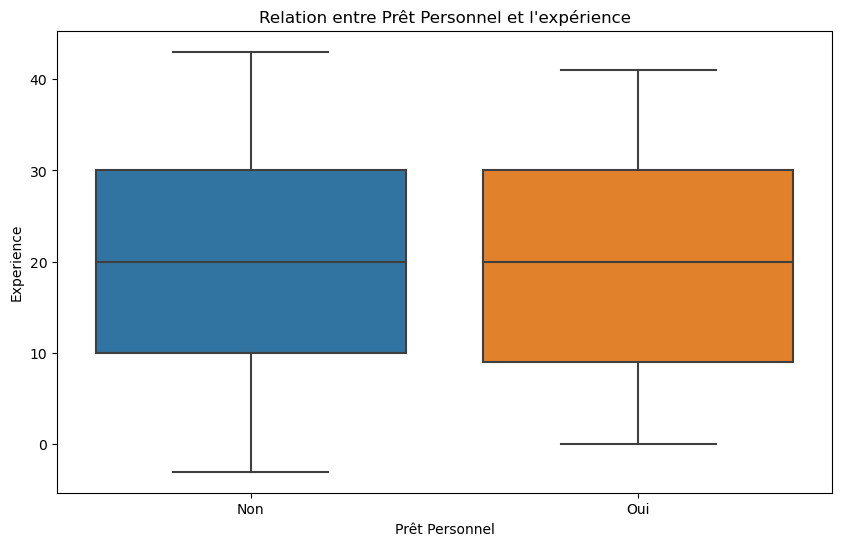

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot pour 'Prêt Personnel' selon l'expérience
plt.figure(figsize=(10, 6))
sns.boxplot(x='Prêt Personnel', y='Experience', data=df)
plt.title('Relation entre Prêt Personnel et l\'expérience')
plt.show()


Prêt Personnel selon le Revenu Millier'

In [19]:
# Statistiques descriptives pour 'Prêt Personnel' selon le revenu
stats_revenu_pret_personnel = df.groupby('Prêt Personnel')['Revenu Millier'].describe()

# Afficher les résultats
print("Statistiques descriptives pour 'Prêt Personnel' selon le revenu:\n", stats_revenu_pret_personnel)


Statistiques descriptives pour 'Prêt Personnel' selon le revenu:
                  count        mean        std   min    25%    50%    75%  \
Prêt Personnel                                                             
Non             4415.0   65.985730  40.456626   8.0   35.0   59.0   84.0   
Oui              479.0  144.647182  31.543335  60.0  122.0  142.0  172.0   

                  max  
Prêt Personnel         
Non             224.0  
Oui             203.0  


In [20]:
from scipy.stats import f_oneway

# Diviser le DataFrame en groupes selon 'Prêt Personnel'
groupes_revenu = [df['Revenu Millier'][df['Prêt Personnel'] == cat] for cat in df['Prêt Personnel'].unique()]

# Effectuer le test ANOVA
statistique, p_value = f_oneway(*groupes_revenu)
print(f"Test ANOVA pour 'Prêt Personnel' selon le revenu : statistique = {statistique}, p-value = {p_value}")


Test ANOVA pour 'Prêt Personnel' selon le revenu : statistique = 1698.6838379792669, p-value = 5.38556e-319


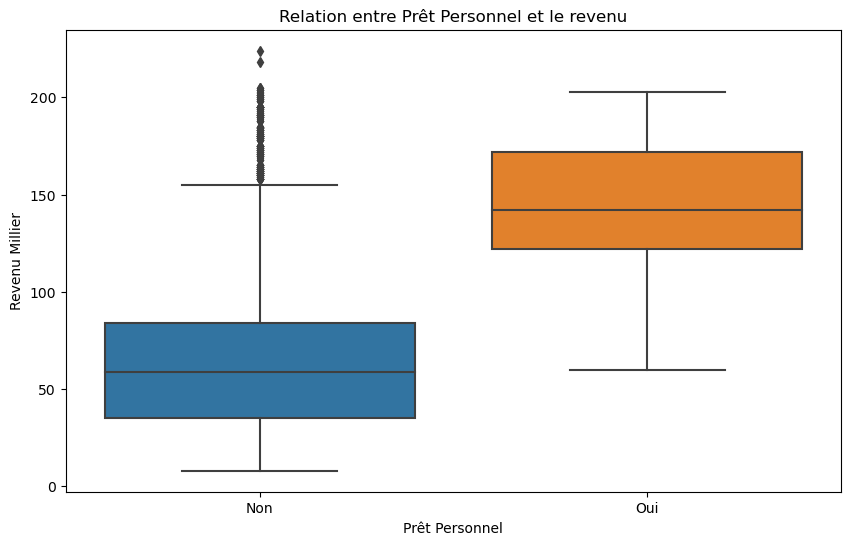

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot pour 'Prêt Personnel' selon le revenu
plt.figure(figsize=(10, 6))
sns.boxplot(x='Prêt Personnel', y='Revenu Millier', data=df)
plt.title('Relation entre Prêt Personnel et le revenu')
plt.show()


Prêt Personnel selon la variable 'Famille'

In [33]:
# Statistiques descriptives pour 'Prêt Personnel' selon la variable 'Famille'
stats_famille_pret_personnel = df.groupby('Famille')['Prêt Personnel'].describe()   

# Afficher les résultats
print("Statistiques descriptives pour 'Prêt Personnel' selon la variable 'Famille':\n", stats_famille_pret_personnel)


Statistiques descriptives pour 'Prêt Personnel' selon la variable 'Famille':
         count unique  top  freq
Famille                        
1        1436      2  Non  1330
2        1243      2  Non  1137
3        1010      2  Non   877
4        1205      2  Non  1071


In [34]:
from scipy.stats import ttest_ind

# Diviser le DataFrame en deux groupes selon 'Prêt Personnel'
groupe_oui_famille = df[df['Prêt Personnel'] == 'Oui']['Famille']
groupe_non_famille = df[df['Prêt Personnel'] == 'Non']['Famille']

# Effectuer le test t de Student
statistique, p_value = ttest_ind(groupe_oui_famille, groupe_non_famille)
print(f"Test t de Student pour 'Prêt Personnel' selon la variable 'Famille' : statistique = {statistique}, p-value = {p_value}")


Test t de Student pour 'Prêt Personnel' selon la variable 'Famille' : statistique = 4.227567551570957, p-value = 2.4053932358280718e-05


In [32]:
from scipy.stats import f_oneway

# Diviser le DataFrame en groupes selon 'Prêt Personnel'
groupes_famille = [df['Famille'][df['Prêt Personnel'] == cat] for cat in df['Prêt Personnel'].unique()]

# Effectuer le test ANOVA
statistique, p_value = f_oneway(*groupes_famille)
print(f"Test ANOVA pour 'Prêt Personnel' selon la variable 'Famille' : statistique = {statistique}, p-value = {p_value}")


Test ANOVA pour 'Prêt Personnel' selon la variable 'Famille' : statistique = 17.8723274030957, p-value = 2.405393235828769e-05


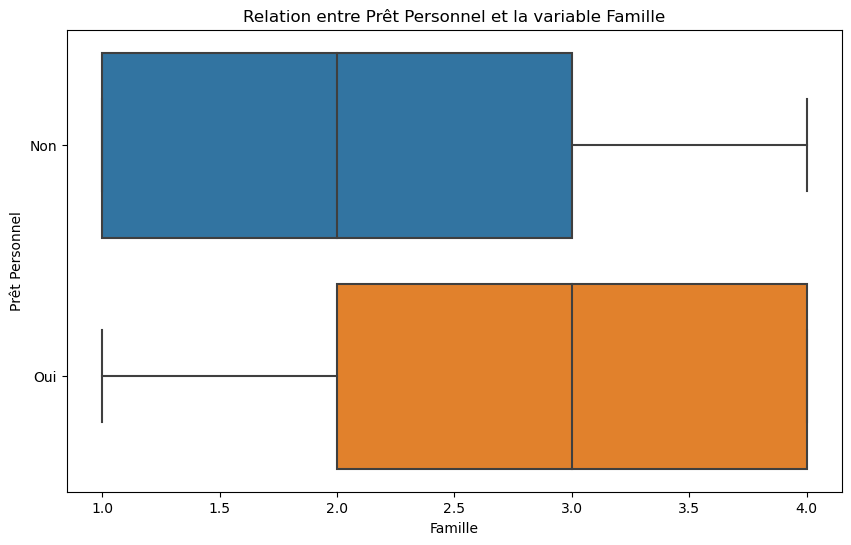

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot pour 'Prêt Personnel' selon la variable 'Famille'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Famille', y='Prêt Personnel', data=df)
plt.title('Relation entre Prêt Personnel et la variable Famille')
plt.show()


In [26]:
Prêt Personnel selon la variable 'DepensesMensuelles'

SyntaxError: invalid syntax (1288229219.py, line 1)

In [ ]:
# Statistiques descriptives pour 'Prêt Personnel' selon les dépenses mensuelles
stats_depenses_pret_personnel = df.groupby('Prêt Personnel')['DepensesMensuelles'].describe()

# Afficher les résultats
print("Statistiques descriptives pour 'Prêt Personnel' selon les dépenses mensuelles:\n", stats_depenses_pret_personnel)


In [ ]:
from scipy.stats import ttest_ind

# Diviser le DataFrame en deux groupes selon 'Prêt Personnel'
groupe_oui_depenses = df[df['Prêt Personnel'] == 'Oui']['DepensesMensuelles']
groupe_non_depenses = df[df['Prêt Personnel'] == 'Non']['DepensesMensuelles']

# Effectuer le test t de Student
statistique, p_value = ttest_ind(groupe_oui_depenses, groupe_non_depenses)
print(f"Test t de Student pour 'Prêt Personnel' selon les dépenses mensuelles : statistique = {statistique}, p-value = {p_value}")


In [ ]:
from scipy.stats import f_oneway

# Diviser le DataFrame en groupes selon 'Prêt Personnel'
groupes_depenses = [df['DepensesMensuelles'][df['Prêt Personnel'] == cat] for cat in df['Prêt Personnel'].unique()]

# Effectuer le test ANOVA
statistique, p_value = f_oneway(*groupes_depenses)
print(f"Test ANOVA pour 'Prêt Personnel' selon les dépenses mensuelles : statistique = {statistique}, p-value = {p_value}")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot pour 'Prêt Personnel' selon les dépenses mensuelles
plt.figure(figsize=(10, 6))
sns.boxplot(x='Prêt Personnel', y='DepensesMensuelles', data=df)
plt.title('Relation entre Prêt Personnel et les dépenses mensuelles')
plt.show()


In [ ]:
Prêt Personnel selon la variable 'Education'

In [ ]:
# Tableau croisé dynamique entre 'Prêt Personnel' et 'Education'
tableau_croise = pd.crosstab(df['Prêt Personnel'], df['Education'])

# Afficher le tableau croisé
print("Tableau croisé dynamique entre 'Prêt Personnel' et 'Education':\n", tableau_croise)


In [ ]:
tab2=pd.crosstab(df['Prêt Personnel'], df['Education'],normalize='index')
tab2

In [ ]:
round(100*tab2,2)

In [ ]:
from scipy.stats import chi2_contingency

# Effectuer le test du Chi2 d'indépendance
statistique, p_value, _, _ = chi2_contingency(tableau_croise)
print(f"Test du Chi2 d'indépendance entre 'Prêt Personnel' et 'Education' : statistique = {statistique}, p-value = {p_value}")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer les fréquences pour 'Prêt Personnel' selon 'Education'
freq_table = df.groupby(['Prêt Personnel', 'Education']).size().unstack('Prêt Personnel').apply(lambda x: x / x.sum(), axis=1)

# Graphique en barres pour 'Prêt Personnel' selon 'Education' avec fréquences
plt.figure(figsize=(10, 6))
freq_table.plot(kind='bar', stacked=True)
plt.title('Relation entre Prêt Personnel et Education (en fréquences)')
plt.xlabel('Education')
plt.ylabel('Fréquence')
plt.legend(title='Prêt Personnel')
plt.show()


In [ ]:
Prêt Personnel selon la variable 'EpargneLogement'

In [ ]:
# Tableau croisé dynamique entre 'Prêt Personnel' et 'EpargneLogement'
tableau_croise_epargne = pd.crosstab(df['Prêt Personnel'], df['EpargneLogement'])

# Afficher le tableau croisé
print("Tableau croisé dynamique entre 'Prêt Personnel' et 'EpargneLogement':\n", tableau_croise_epargne)


In [ ]:
tab2=pd.crosstab(df['Prêt Personnel'], df['EpargneLogement'],normalize='index')   
tab2

In [ ]:
round(100*tab2,2)

In [ ]:
from scipy.stats import chi2_contingency

# Effectuer le test du Chi2 d'indépendance
statistique, p_value, _, _ = chi2_contingency(tableau_croise_epargne)
print(f"Test du Chi2 d'indépendance entre 'Prêt Personnel' et 'EpargneLogement' : statistique = {statistique}, p-value = {p_value}")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer les fréquences pour 'Prêt Personnel' selon 'EpargneLogement'
freq_table = df.groupby(['Prêt Personnel', 'EpargneLogement']).size().unstack('Prêt Personnel').apply(lambda x: x / x.sum(), axis=1)

# Graphique en barres pour 'Prêt Personnel' selon 'EpargneLogement' avec fréquences
plt.figure(figsize=(10, 6))
freq_table.plot(kind='bar', stacked=True)
plt.title('Relation entre Prêt Personnel et EpargneLogement (en fréquences)')
plt.xlabel('EpargneLogement')
plt.ylabel('Fréquence')
plt.legend(title='Prêt Personnel')
plt.show()


In [ ]:
# Pandas, Numpy, os et changement de répertoire de travail
import pandas as pd 
import pandas.plotting as pdl
import numpy as np 
import os
#os.chdir('C:/Users/peron/Documents/Travail/Enseignement/NoteBooks/NoteBooksPY')

# Scikit-Learn
import sklearn as sk
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split  ### permet de partager DA et DT
from sklearn.model_selection import StratifiedShuffleSplit   ### Fonction qui permet de faire des échantillonnage stratifié
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# StatsModels

import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit 

# Pour les graphiques 

%matplotlib  inline
# Ceci permet d'afficher les graphique directement dans l'output du notebbok
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
def evaluate_model(model, X_test, y_true, model_name,plot_roc=False):
    # Faire des prédictions
    y_predict = model.predict(X_test)
    y_pred = ( y_predict > 0.5).astype(int)
    
    # Calculer la matrice de confusion
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Classe 0', 'Classe 1'],
                yticklabels=['Classe 0', 'Classe 1'])
    plt.xlabel('Valeurs prédites')
    plt.ylabel('Valeurs réelles')
    plt.title('Matrice de Confusion')
    plt.show()

    # Calcul des métriques d'évaluation
    accuracy = round(accuracy_score(y_true, y_pred),2)
    precision = round(precision_score(y_true, y_pred),2)
    recall = round(recall_score(y_true, y_pred),2)
    

    # Affichage des métriques
    print('\033[1m',"Métriques d'évaluation pour le modèle {} :".format(model_name), '\033[0m')
    print("Exactitude:", accuracy)
    print("Précision:", round(precision, 3))
    print("Rappel:", recall)
    

    # Tracer la courbe ROC
    
    fpr, tpr, _ = roc_curve(y_true, y_predict)
    auc_score = auc(fpr, tpr)
    print("L'AUC du modèle {} est : {:.4f}".format(model_name, auc_score))
    
    if plot_roc:
        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='{} ROC curve (area = {:.2f})'.format(model_name, auc_score))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('Taux de faux positif')
        plt.ylabel('Taux de vrai positif')
        plt.title('Courbe ROC - {}'.format(model_name))
        plt.legend(loc='lower right')
        plt.show()
    

In [ ]:
df=df.drop(columns=['ID'])
var = df.columns
print(var)


In [ ]:
df.columns=['Age','EXP','RM','FAM','DEP','EDU','EL','Prêt']


In [ ]:
df.head()

In [ ]:
df['Prêt'].value_counts()

In [ ]:
df['Prêt'].value_counts(normalize=True)

In [ ]:
df.groupby('Prêt')[['FAM','RM']].describe() 

In [ ]:
sns.boxplot(x='Prêt', y='RM',data=df,palette=["b", "g"])

plt.xlabel("Prêt")
plt.ylabel("RM")
plt.grid()

plt.show()

In [ ]:
df.loc[df['RM'] > 160].index

In [ ]:
### Intégration des variables qualitatives ###

Nous allons transformer ces variables qualitatives en dummy variale

In [ ]:
df.head()

In [ ]:
df2 = pd.get_dummies(df, columns=(['EL']))
df2[0:3]

In [ ]:
## J'enlève des colonnes pour mes variables explicatives, je transforme True et False en chiffre 0 et 1 et j'ajoute une constante. 
X2=df2.drop(columns=['EL_Non',"Prêt",])
X2["EL_Oui"]=X2["EL_Oui"].astype(int)
X2 = sm.add_constant(X2)
y=df2["Prêt"]=="Oui"
y=y.astype(int)
X2.head()

In [ ]:
y.head(),type(y)

In [ ]:
X_a, X_t, y_a, y_t= train_test_split(X2, y, test_size=0.30, random_state=3)

In [ ]:
type(y_a),type(X_a)

In [ ]:
model2 = sm.Logit(y_a, X_a)
result2 = model2.fit()

result2.summary()

In [ ]:
X1_a=X_a.drop(columns=['Age','EXP','DEP'])

In [ ]:
model2 = sm.Logit(y_a, X1_a)
result2 = model2.fit()

result2.summary()

In [ ]:
evaluate_model(result2,X_t.drop(columns=['Age','EXP','DEP']),y_t,"Modèle Logit",plot_roc=True)

###  Les rapports de côtes

In [ ]:
result2.conf_int()

In [ ]:
RC = np.exp(result2.params)
CI = np.exp(result2.conf_int())

fig, ax = plt.subplots()
RC.plot(ax=ax, kind='bar', yerr=(CI[1] - CI[0])/2, capsize=4)
ax.set_title('Rapports de cote avec intervalle de confiance à 95%')
plt.show()

### **Prevision pour de nouvelles données**

In [ ]:
df_Nvlle=pd.read_csv("C:/Users/tyuiop/Desktop/Perron/Banque_Nvlle.csv", sep=";", decimal=",",encoding="latin1") 
df_Nvlle,df_Nvlle.shape

In [ ]:
df_Nvlle=df_Nvlle.drop(columns=['ID'])
df_Nvlle.columns=['Age','EXP','RM','FAM','DEP','EDU','EL']
df_Nvlle.head()

In [ ]:
df_Nvlle1 = pd.get_dummies(df_Nvlle,columns=(['EL']))
df_Nvlle1[0:3]

In [ ]:
XN=df_Nvlle1.drop(columns=['EL_Non'])
XN["EL_Oui"]=XN["EL_Oui"].astype(int)
XN = sm.add_constant(XN)
XN.head()

In [ ]:
result2.predict(XN)

In [ ]:
(result2.predict(XN) > 0.5).astype(int)

#### On le fait avec la fonction Logisticregression de Sklearn

In [ ]:
model = LogisticRegression(fit_intercept=False)
result5_1=model.fit(X1_a, y_a)
result5_1.coef_ 



In [ ]:
evaluate_model(result5_1,X_t.drop(columns=['Age','EXP','DEP']),y_t,"Modèle Logit",plot_roc=True)

<div class="alert alert-block alert-danger">

Pour faire la courbe ROC et l'AUC il faut les probabilités en utilisant cette fonction Logistic regression de Sklearn

</div>
 

In [ ]:
y_proba = result5_1.predict_proba(X_t.drop(columns=['Age','EXP','DEP']))
fpr, tpr, _ = roc_curve(y_t,y_proba[:, 1])
auc_score = auc(fpr, tpr)
print("L'AUC du modèle est : " , auc_score)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=' ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positif')
plt.ylabel('Taux de vrai positif')
plt.title('Courbe ROC - Model Logit pondéré')
plt.legend(loc='lower right')
plt.show()


#### **Si on veut maintenant augmenter le poids de la classe 1 qui est déséquilibré, on peut utiliser le poids associé aux données pour les surévaluer.** ####

Nous allons utiliser la fonction logistique regression de scikit-learn qui permet d'ajuster le poids des différents éléments.

Le problème est que la représentatrion n'est pas terrible du tout.


In [ ]:
model = LogisticRegression(fit_intercept=False,class_weight={0: 1, 1:10})
result6=model.fit(X1_a,y_a) 

In [ ]:
result6.coef_ 

In [ ]:
evaluate_model(result6,X_t.drop(columns=['Age','EXP','DEP']),y_t,"Modèle Logit",plot_roc=True)

In [ ]:
y_proba = result6.predict_proba(X_t.drop(columns=['Age','EXP','DEP']))

In [ ]:
fpr, tpr, _ = roc_curve(y_t,y_proba[:, 1])
auc_score = auc(fpr, tpr)
print("L'AUC du modèle est : " , auc_score)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=' ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positif')
plt.ylabel('Taux de vrai positif')
plt.title('Courbe ROC - Model Logit pondéré')
plt.legend(loc='lower right')
plt.show()

#### Prévision pour de nouvelles données avec le modèle pondéré

In [ ]:
XN=df2.drop(columns=['EL_Non'])
XN["EL_Oui"]=XN["EL_Oui"].astype(int)
XN = sm.add_constant(XN)
XN.head()

## Comparaisons des modèles logit/probit/cloglog

In [ ]:
logit = sm.GLM(y_a, X_a, family=sm.families.Binomial())
result_log=logit.fit()

In [ ]:
result_log.summary()

In [ ]:
probit= sm.GLM(y_a, X_a,family=sm.families.Binomial(link=sm.families.links.probit()))
result_probit=probit.fit()
result_probit.summary()

In [ ]:
cloglog= sm.GLM(y_a, X_a,family=sm.families.Binomial(link=sm.families.links.CLogLog()))
result_cloglog=cloglog.fit()
result_cloglog.summary()

### Les évaluations des modèles

In [ ]:
evaluate_model(result_log,X_t,y_t,"Modèle Logit")

In [ ]:
evaluate_model(result_probit,X_t,y_t,"Modèle Probit")

In [ ]:
evaluate_model(result_cloglog,X_t,y_t,"Modèle cloglog")

### Pour les courbes ROC

In [ ]:
## Logit
y_predict_L = result_log.predict(X_t)
fprL, tprL, _ = roc_curve(y_t, y_predict_L)
auc_score_L = auc(fprL, tprL)
auc_score_L

In [ ]:
## Probit

y_predict_P = result_probit.predict(X_t)
fprP, tprP, _ = roc_curve(y_t, y_predict_P)
auc_score_P = auc(fprP, tprP)

auc_score_P


In [ ]:
## Cloglog

y_predict_Log = result_cloglog.predict(X_t)
fprLog, tprLog, _ = roc_curve(y_t, y_predict_Log)
auc_score_Log = auc(fprLog, tprLog)
auc_score_Log 

In [ ]:
# pour le logit, Probit,SVM, Arbre Gini et Arbre Entropie

plt.plot(fprL,tprL,"g--",label='Logit : (auc={:.3f}) '.format(auc_score_L))
plt.plot(fprP,tprP,"m-",label='Probit: (auc={:.3f}) '.format(auc_score_P))
plt.plot(fprLog,tprLog,"b-.",label='CLogLog: (auc={:.3f}) '.format(auc_score_Log))

# Aléatoire

plt.plot([0,1],[0,1],"k-")  #, label="Aléatoire"

plt.xlabel("Taux de faux positif")
plt.ylabel("Taux de vrais positifs")
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.suptitle("Courbe ROC des 3 modèles")
plt.show()

## Utilisation de ceci pour des données déséquilibrées

Dnas GLM de SM, il y a la possibilité de mettre les poids avec un eoption ***freq_weights***. Il s nécessaire d'avoir les poids pur toutes les valeurs de la variable dépendante.

In [ ]:
### Evaluation avec les poids

In [ ]:
valeur = y_a.value_counts(normalize=True)
valeur


In [ ]:
valeur = y_a.value_counts(normalize=True)
valeur


In [ ]:
# Calculer l'inverse de chaque fréquence pour obtenir les poids

inverse_frequences = 1 / valeur[y_a]
inverse_frequences

In [ ]:
logit3 = sm.GLM(y_a, X1_a,freq_weights=inverse_frequences ,family=sm.families.Binomial())
result_log3=logit3.fit()
result_log3.summary()

In [ ]:
evaluate_model(result_log3,X_t.drop(columns=['Age','EXP','DEP']),y_t,"Modèle Logit avec poids")